In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)

In [3]:
torch.manual_seed(71)

In [4]:
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)

In [5]:
y = 2 * X + 1 + e

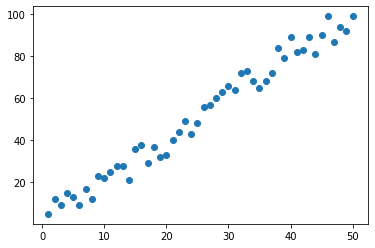

In [6]:
plt.scatter(X.numpy(), y.numpy())

In [7]:
# Check how to perform this simple Linear model against random integers between 0 - 50 predicting y.
x1 = torch.linspace(0, 50, 50)
x1

tensor([ 0.0000,  1.0204,  2.0408,  3.0612,  4.0816,  5.1020,  6.1224,  7.1429,
         8.1633,  9.1837, 10.2041, 11.2245, 12.2449, 13.2653, 14.2857, 15.3061,
        16.3265, 17.3469, 18.3673, 19.3878, 20.4082, 21.4286, 22.4490, 23.4694,
        24.4898, 25.5102, 26.5306, 27.5510, 28.5714, 29.5918, 30.6122, 31.6327,
        32.6531, 33.6735, 34.6939, 35.7143, 36.7347, 37.7551, 38.7755, 39.7959,
        40.8163, 41.8367, 42.8571, 43.8776, 44.8980, 45.9184, 46.9388, 47.9592,
        48.9796, 50.0000])

In [8]:
# Calculate y1 with custom weight and bias.
w1 = 0.10597813129425049    # Very first weigh declaration.
b1 = 0.9637961387634277     # Very first bias declaration.

In [9]:
y1 = (x1 * w1) + b1

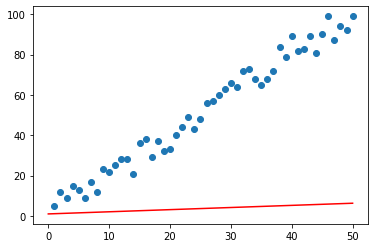

In [10]:
# Plot a graph for this agains original values.
plt.scatter(X.numpy(), y.numpy()) # Original values.
plt.plot(x1, y1, 'r')    # First goes 'X' axis then 'Y' axis.

In [11]:
# Model to train. (Refer the file 'linear_regression.py')
class Model(nn.Module):

    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        py_predicted = self.linear(x)
        return py_predicted

In [12]:
model = Model(1, 1)
model


Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
name, param = model.parameters()
name.item(), param.item() # Tuple

(-0.5688724517822266, -0.03454399108886719)

epoch: 1, loss: 5759.10107421875, weight: -0.5688724517822266, bias: -0.03454399108886719
epoch: 2, loss: 2983.8740234375, weight: 3.869683265686035, bias: 0.09853759407997131
epoch: 3, loss: 1551.1226806640625, weight: 0.6804516315460205, bias: 0.004986658692359924
epoch: 4, loss: 811.4431762695312, weight: 2.9719016551971436, bias: 0.07427366822957993
epoch: 5, loss: 429.57305908203125, weight: 1.325398325920105, bias: 0.02655813843011856
epoch: 6, loss: 232.42645263671875, weight: 2.5083751678466797, bias: 0.06290970742702484
epoch: 7, loss: 130.645751953125, weight: 1.6583266258239746, bias: 0.03885675221681595
epoch: 8, loss: 78.09941101074219, weight: 2.269038200378418, bias: 0.05820438265800476
epoch: 9, loss: 50.97089385986328, weight: 1.8301711082458496, bias: 0.04636702686548233
epoch: 10, loss: 36.964725494384766, weight: 2.1454427242279053, bias: 0.056935567408800125
epoch: 11, loss: 29.73311996459961, weight: 1.918853759765625, bias: 0.051404114812612534
epoch: 12, loss: 2

Text(0, 0.5, 'MSE Losses')

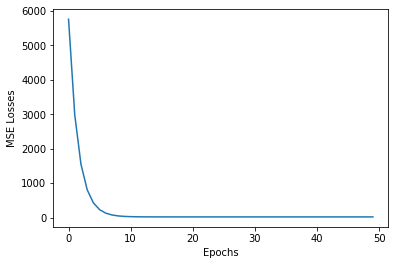

In [14]:
# LEARN WITH NEURAL NETWORK - Model class.
criterion = nn.MSELoss()    # Loss function.
# Stochastic Gradient Descent.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

epochs = 50 # Number of training rounds
losses = [] # Losses record into this list.

for i in range(epochs):
    i += 1  # End the loop.

    # Predict on the forward pass.
    y_predict = model.forward(X)
    # Calculate the loss function.
    loss = criterion(y_predict, y)

    # Record loss values.
    losses.append(loss)
    print(f"epoch: {i}, loss: {loss}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")

    # Zero out the gradient.
    optimizer.zero_grad()

    # Back propagate the loss.
    loss.backward()
    # Update hyper parameters (weight and bias in this case) of the model.
    optimizer.step()

plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Losses")


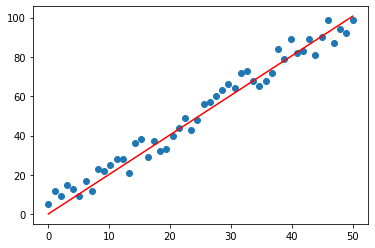

In [15]:
# Test trained data.
x = np.linspace(0., 50., 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

y_prediction = current_weight * x + current_bias

# Plot predicted 'y'.
plt.scatter(x, y)
plt.plot(x, y_prediction, 'r')
